## Insurance PROJECT
Descripción de la tarea: Examinar la calidad del conjunto de datos adjunto. Utilice ML (Python) para encontrar perspectivas, patrones ocultos y tendencias de previsión; todo lo relacionado con la previsión financiera y de riesgos, así como el perfil del cliente ideal (ICP).

In [894]:
#libraries used to read csv files, transform data (na, duplicates etc)
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

## Data upload.

In [895]:
# Read CSV files into pandas DataFrame
df = pd.read_csv('insurance_data_sample.csv')

df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Amount_paid_for_insurance,Claim amount,City
0,C_CND_000001,01/02/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÃ‚Â Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,1665,0.00,Riga
1,C_CND_000002,01/02/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÃ‚Â Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,1332,1900.00,Liepaja
2,C_CND_000003,01/02/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,1897,0.00,Riga
3,C_CND_000004,01/02/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,1176,0.00,Jelgava
4,C_CND_000005,01/02/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÃ‚Â Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,1323,2450.00,Liepaja


## Data cleaning and analysis.

In this section we are going to type them and clean up anomalous data, missing values and explore around the columns.

In [896]:
#Column name standardization
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

pd.set_option('display.float_format', lambda x: '%.2f' % x)

print('Total', df.shape[0])

Total 23906


In [897]:
#info types
df.dtypes

car_id                        object
date                          object
customer_name                 object
gender                        object
annual_income                  int64
dealer_name                   object
company                       object
model                         object
engine                        object
transmission                  object
color                         object
price_($)                      int64
dealer_no                     object
body_style                    object
phone                          int64
amount_paid_for_insurance      int64
claim_amount                 float64
city                          object
dtype: object

In [898]:
#transform date
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df.date

0       2022-01-02
1       2022-01-02
2       2022-01-02
3       2022-01-02
4       2022-01-02
           ...    
23901   2023-12-31
23902   2023-12-31
23903   2023-12-31
23904   2023-12-31
23905   2023-12-31
Name: date, Length: 23906, dtype: datetime64[ns]

In [899]:
# CUSTOMER NAME

df['customer_name'] = df['customer_name'].str.strip()
df['customer_name'] = df['customer_name'].astype('category')


In [900]:
# Gender
df['gender'] = df['gender'].astype('category')
df['gender'] = df['gender'].astype('category')

In [901]:
# Anual Income
df['annual_income'].describe()

count      23906.00
mean      830840.29
std       720006.40
min        10080.00
25%       386000.00
50%       735000.00
75%      1175750.00
max     11200000.00
Name: annual_income, dtype: float64

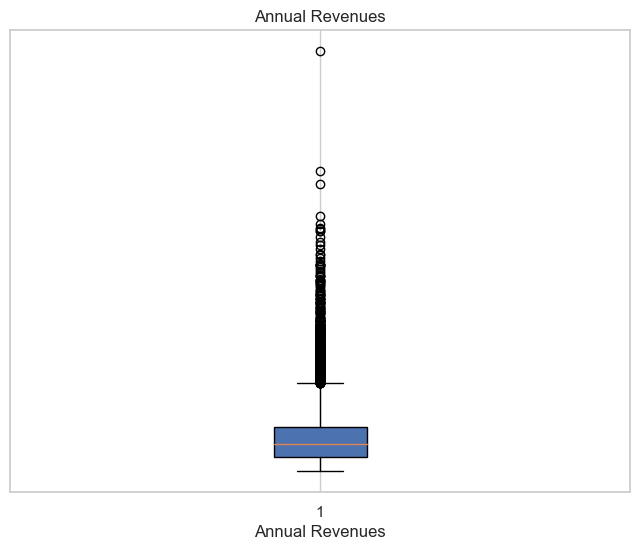

Number of outliers 816


In [902]:
#annual_income 

#quartiles
q1 = df['annual_income'].quantile(0.25)
q3 = df['annual_income'].quantile(0.75)
iqr = q3 - q1

# limits 
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['annual_income'] < lower_bound) | (df['annual_income'] > upper_bound)]
plt.figure(figsize=(8, 6))
plt.boxplot(df['annual_income'], vert=True, patch_artist=True)
plt.title('Annual Revenues')
plt.xlabel('Annual Revenues')
plt.yticks([])
plt.grid(True)
plt.show()

print('Number of outliers', len(outliers))

We see that the difference between the minimum and maximum values is very large, which means that the distribution is not symmetrical and is skewed to the right. At the same time, we observe the existence of outliers. Since the interquartile range comprises 50% of the data distribution, we proceed to eliminate those records considered to be outliers. A logarithmic scale could also be applied to reduce the influence of the high values, but in our case we proceed to eliminate them.

In [903]:
df = df[(df['annual_income'] >= lower_bound) & (df['annual_income'] <= upper_bound)]

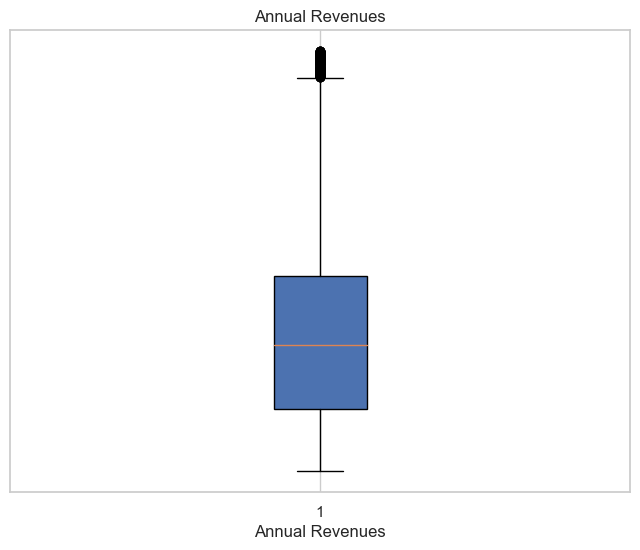

In [904]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['annual_income'], vert=True, patch_artist=True)
plt.title('Annual Revenues')
plt.xlabel('Annual Revenues')
plt.yticks([])
plt.grid(True)
plt.show()

In [905]:
df.shape

(23090, 18)

In [906]:
df['annual_income'].describe()

count     23090.00
mean     749642.25
std      563609.76
min       10080.00
25%      360000.00
50%      715000.00
75%     1100000.00
max     2360000.00
Name: annual_income, dtype: float64

In [907]:
#Dealer name
df['dealer_name'] = df['dealer_name'].str.strip()
unique_dealer = df['dealer_name'].unique()
print(unique_dealer)

df['dealer_name'] = df['dealer_name'].astype('category')

["Buddy Storbeck's Diesel Service Inc" 'C & M Motors Inc' 'Capitol KIA'
 'Chrysler of Tri-Cities' 'Chrysler Plymouth' 'Classic Chevy'
 'Clay Johnson Auto Sales' 'U-Haul CO' 'Rabun Used Car Sales'
 'Race Car Help' 'Saab-Belle Dodge' 'Scrivener Performance Engineering'
 'Diehl Motor CO Inc' 'Star Enterprises Inc' 'Suburban Ford'
 'Tri-State Mack Inc' 'Progressive Shippers Cooperative Association No'
 'Ryder Truck Rental and Leasing' 'Enterprise Rent A Car'
 'Gartner Buick Hyundai Saab' 'Hatfield Volkswagen' 'Iceberg Rentals'
 'McKinney Dodge Chrysler Jeep' 'Motor Vehicle Branch Office'
 'Nebo Chevrolet' 'New Castle Ford Lincoln Mercury' 'Pars Auto Sales'
 'Pitre Buick-Pontiac-Gmc of Scottsdale']


In [908]:
#company
unique_companies = df['company'].unique()
print(unique_companies)

df['company'] = df['company'].astype('category')

df.company.describe()

['Ford' 'Dodge' 'Cadillac' 'Toyota' 'Acura' 'Mitsubishi' 'Chevrolet'
 'Nissan' 'Mercury' 'BMW' 'Chrysler' 'Subaru' 'Hyundai' 'Honda' 'Audi'
 'Porsche' 'Volkswagen' 'Buick' 'Saturn' 'Mercedes-B' 'Jaguar' 'Volvo'
 'Pontiac' 'Lincoln' 'Oldsmobile' 'Lexus' 'Plymouth' 'Saab' 'Infiniti'
 'Jeep']


count         23090
unique           30
top       Chevrolet
freq           1773
Name: company, dtype: object

In [909]:
#model
pattern = r'\b(?:03-Sep|05-Sep)\b'

df = df[~df['model'].str.contains(pattern, regex=True)]

unique_model = df['model'].unique()
print(unique_model)

df['model'] = df['model'].astype('category')

df.model.describe()
print('Total Registros', df.shape[0])

['Expedition' 'Durango' 'Eldorado' 'Celica' 'TL' 'Diamante' 'Corolla'
 'Galant' 'Malibu' 'Escort' 'RL' 'Pathfinder' 'Grand Marquis' '323i'
 'Sebring Coupe' 'Forester' 'Accent' 'Land Cruiser' 'Accord' '4Runner'
 'A4' 'Carrera Cabrio' 'Jetta' 'Viper' 'Regal' 'LHS' 'LW' '3000GT'
 'SLK230' 'Civic' 'S-Type' 'S40' 'Mountaineer' 'Park Avenue'
 'Montero Sport' 'Sentra' 'S80' 'Lumina' 'Bonneville' 'C-Class' 'DeVille'
 'Stratus' 'Cougar' 'SW' 'C70' 'SLK' 'Tacoma' 'M-Class' 'A6' 'Intrepid'
 'Sienna' 'Eclipse' 'Contour' 'Town car' 'Focus' 'Mustang' 'Cutlass'
 'Corvette' 'Impala' 'Cabrio' 'Dakota' '300M' '328i' 'Maxima' 'Ram Pickup'
 'Concorde' 'V70' 'Quest' 'ES300' 'SL-Class' 'Explorer' 'Prizm' 'Camaro'
 'Outback' 'Taurus' 'Cavalier' 'GS400' 'Monte Carlo' 'Sonata' 'Metro'
 'Voyager' 'Cirrus' 'Avenger' 'Odyssey' 'Intrigue' 'Silhouette' '528i'
 'LS400' 'Aurora' 'Breeze' 'Beetle' 'Elantra' 'Continental' 'RAV4' 'S70'
 'Altima' 'LS' 'Ram Van' 'S-Class' 'E-Class' 'Grand Am' 'SC' 'Sable'
 'Bravada' 'Pass

In [910]:
#columna engine
df['engine'] = df['engine'].str.replace('Ã‚Â', '').str.replace('\xa0', ' ')
unique_engine = df['engine'].unique()
print(unique_engine)

df['engine'] = df['engine'].astype('category')

df.engine.describe()

['Double Overhead Camshaft' 'Overhead Camshaft']


count                        22888
unique                           2
top       Double Overhead Camshaft
freq                         11954
Name: engine, dtype: object

In [911]:
#columna transmission
unique_trans = df['transmission'].unique()
print(unique_trans)

df['transmission'] = df['transmission'].astype('category')

df.transmission.describe()


['Auto' 'Manual']


count     22888
unique        2
top        Auto
freq      11954
Name: transmission, dtype: object

In [912]:
#color
unique_color = df['color'].unique()
print(unique_color)

df['color'] = df['color'].astype('category')

df.color.describe()

['Black' 'Red' 'Pale White']


count          22888
unique             3
top       Pale White
freq           10833
Name: color, dtype: object

In [913]:
#price_($)
unique_price = df['price_($)'].describe()
print(unique_price)

count   22888.00
mean    27980.41
std     14699.08
min      1200.00
25%     18000.00
50%     22600.00
75%     34000.00
max     85800.00
Name: price_($), dtype: float64


There seem to be very cheap cars ($1200).


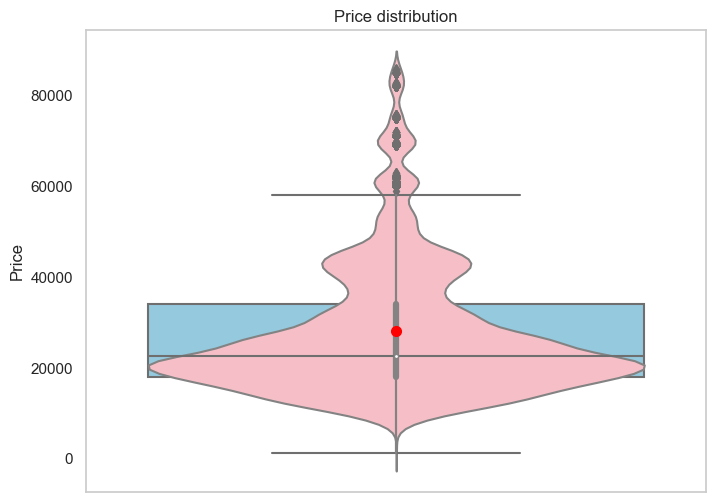

In [914]:
meanprops = {
    "marker": "o",
    "markerfacecolor": "red",
    "markeredgecolor": "red",
    "markersize": 7
}

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['price_($)'], color='skyblue', showmeans=True, meanprops=meanprops, orient='v')
sns.violinplot(y=df['price_($)'], color='lightpink', alpha=0.5, orient='v')
plt.ylabel('Price')
plt.title('Price distribution')
plt.grid(False)
plt.show()


In [915]:
#dealer_no
unique_dealer = df['dealer_no'].unique()
print(unique_dealer)

['06457-3834' '60504-7114' '38701-8047' '99301-3882' '53546-9427'
 '85257-3102' '78758-7841']


This is US CP and indicates where the vehicles imported from the US are from.

In [916]:
zip_to_location = {
    '06457': 'Middletown, CT',
    '60504': 'Aurora, IL',
    '38701': 'Greenville, MS',
    '99301': 'Pasco, WA',
    '53546': 'Janesville, WI',
    '85257': 'Scottsdale, AZ',
    '78758': 'Austin, TX'
}

def get_location(dealer_no):
    zip_code = dealer_no.split('-')[0] if '-' in dealer_no else dealer_no.split(' ')[0]
    return zip_to_location.get(zip_code, 'Unknown Location')

df['zip_usa'] = df['dealer_no'].apply(lambda x: x.split('-')[0] if '-' in x else x.split(' ')[0])
df['location_import'] = df['zip_usa'].apply(get_location)

unique_location = df['location_import'].unique()
print(unique_location)

df['location_import'] = df['location_import'].astype('category')
df['zip_usa'] = df['zip_usa'].astype('category')


df.location_import.describe()
print(df['zip_usa'].unique())

['Middletown, CT' 'Aurora, IL' 'Greenville, MS' 'Pasco, WA'
 'Janesville, WI' 'Scottsdale, AZ' 'Austin, TX']
['06457', '60504', '38701', '99301', '53546', '85257', '78758']
Categories (7, object): ['06457', '38701', '53546', '60504', '78758', '85257', '99301']


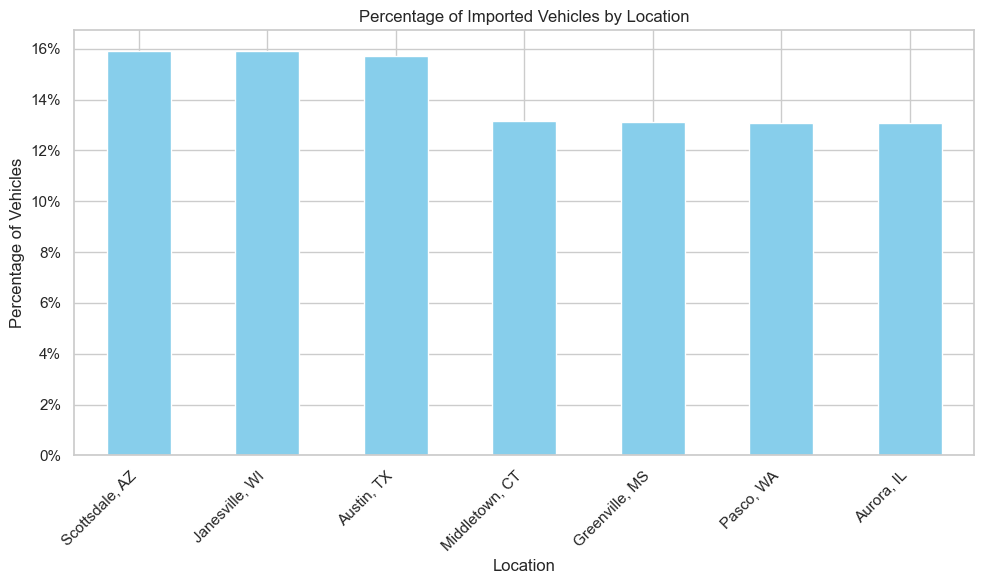

In [917]:

location_counts = df['location_import'].value_counts(normalize=True).sort_values(ascending=False) * 100
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Percentage of Imported Vehicles by Location')
plt.xlabel('Location')
plt.ylabel('Percentage of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))
plt.tight_layout()
plt.show()

In [918]:
#body_style

unique_style = df['body_style'].unique()
print(unique_style)

df['body_style'] = df['body_style'].astype('category')

['SUV' 'Passenger' 'Hatchback' 'Hardtop' 'Sedan']


In [919]:
#phone

unique_phone = df['phone'].unique()
print(unique_phone)

df['phone'] = df['phone'].astype('category')

[8264678 6848189 7298798 ... 7659127 6030764 7020564]


count   21742.00
mean     1536.19
std       573.43
min       103.00
25%      1121.00
50%      1398.00
75%      1836.75
max      3253.00
Name: amount_paid_for_insurance, dtype: float64


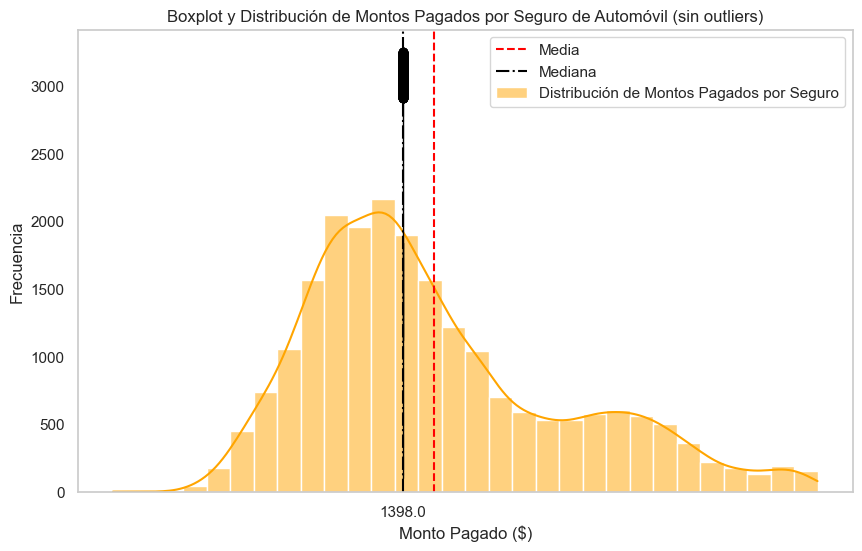

In [920]:
#Amount_paid_for_insurance

df.amount_paid_for_insurance.describe()

Q1 = df['amount_paid_for_insurance'].quantile(0.25)
Q3 = df['amount_paid_for_insurance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['amount_paid_for_insurance'] >= lower_bound) & (df['amount_paid_for_insurance'] <= upper_bound)]


print(df['amount_paid_for_insurance'].describe())


# Calcular la media y la mediana
mean = df['amount_paid_for_insurance'].mean()
median = df['amount_paid_for_insurance'].median()

# Mostrar la distribución de los datos
plt.figure(figsize=(10, 6))
sns.histplot(df['amount_paid_for_insurance'], kde=True, color='orange', bins=30, label='Distribución de Montos Pagados por Seguro')

# Agregar la línea vertical para la media
plt.axvline(x=mean, color='red', linestyle='--', label='Media')

# Agregar la línea vertical para la mediana
plt.axvline(x=median, color='black', linestyle='-.', label='Mediana')

# Crear el boxplot sin outliers
plt.boxplot(df['amount_paid_for_insurance'], vert=True, positions=[median], widths=0.5)
plt.title('Boxplot y Distribución de Montos Pagados por Seguro de Automóvil (sin outliers)')
plt.xlabel('Monto Pagado ($)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(False)
plt.show()

It seems that for the insurance company their best clients are those who claim less than 1376$.

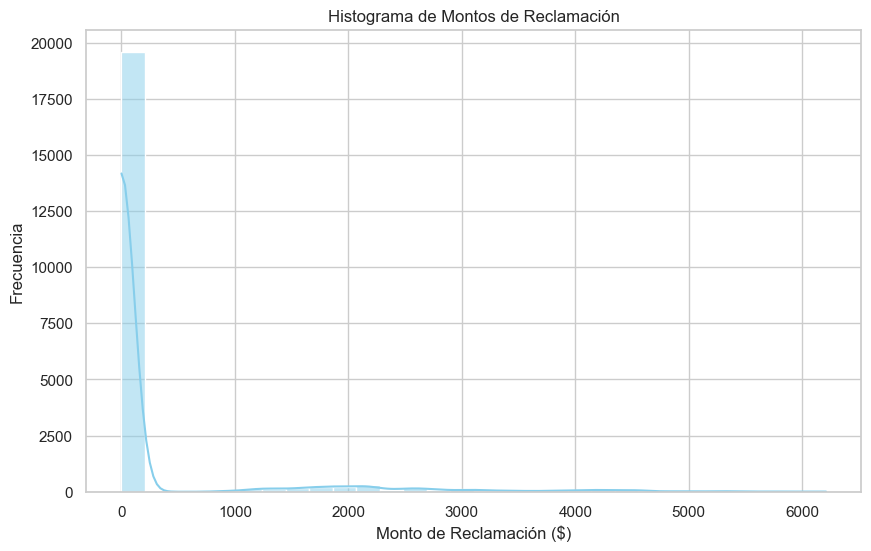

In [921]:
#claim_amount

df['claim_amount'].describe()

plt.figure(figsize=(10, 6))
sns.histplot(df['claim_amount'], bins=30, kde=True, color='skyblue')
plt.title('Histograma de Montos de Reclamación')
plt.xlabel('Monto de Reclamación ($)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


Given that a claimed amount of 0 does not represent an expense for the insurance company, let's examine the expenses of the insurance company without including them.

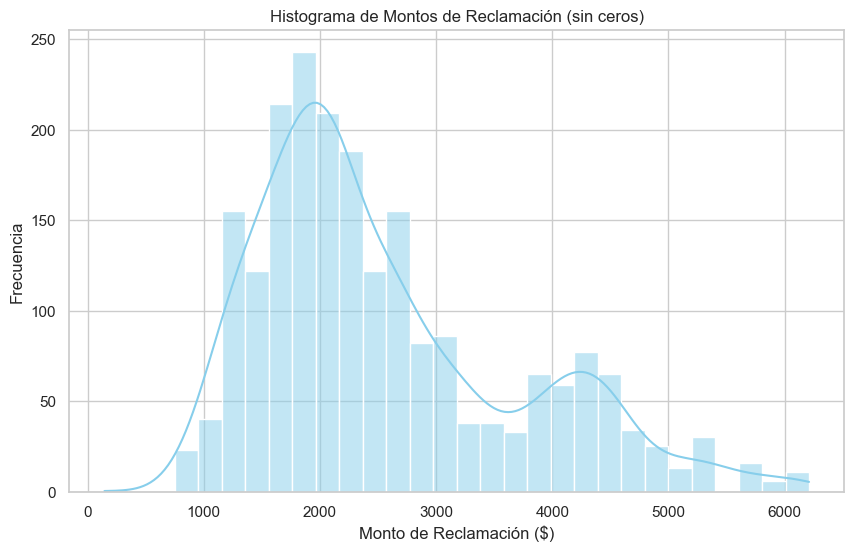

In [922]:
claim_amount_nonzero = df[df['claim_amount'] > 0]['claim_amount']

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(claim_amount_nonzero, bins=30, kde=True, color='skyblue')
plt.title('Histograma de Montos de Reclamación (sin ceros)')
plt.xlabel('Monto de Reclamación ($)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [923]:
#city

unique_city = df['city'].unique()
print(unique_city)

df['city'] = df['city'].astype('category')

['Riga' 'Liepaja' 'Jelgava' 'Ventspils' 'Daugavpils' 'Tukums']


In [924]:
# Duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Number of records after removing duplicates: {len(df)}")
else:
    df = df
    print("No duplicates found.")


#missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

missing_customer_name = df[df['customer_name'].isnull()]

print(missing_customer_name)

#We will check if we should remove this record or, since the column customer_name does not provide
#any useful information, we will remove it

df.head()

Number of duplicate records: 0
No duplicates found.
Missing values in each column:
 car_id                       0
date                         0
customer_name                1
gender                       0
annual_income                0
dealer_name                  0
company                      0
model                        0
engine                       0
transmission                 0
color                        0
price_($)                    0
dealer_no                    0
body_style                   0
phone                        0
amount_paid_for_insurance    0
claim_amount                 0
city                         0
zip_usa                      0
location_import              0
dtype: int64
            car_id       date customer_name gender  annual_income  \
7564  C_CND_007565 2022-11-05           NaN   Male         680000   

           dealer_name company       model                    engine  \
7564  Saab-Belle Dodge   Dodge  Ram Pickup  Double Overhead Camshaft   


,car_id,date,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price_($),dealer_no,body_style,phone,amount_paid_for_insurance,claim_amount,city,zip_usa,location_import
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,1665,0.00,Riga,06457,"Middletown, CT"
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,1332,1900.00,Liepaja,60504,"Aurora, IL"
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,1897,0.00,Riga,38701,"Greenville, MS"
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,1176,0.00,Jelgava,99301,"Pasco, WA"
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,1323,2450.00,Liepaja,53546,"Janesville, WI"


## Observations.

We have transformed the data types to categorical and date formats.

We have cleaned the "Customer Name" field by removing white spaces and identified one missing record.

We have removed the records for the variable "model" dated 05-Sep and 03-Sep.

Lastly, in the "annual_income" column, there is a lot of variability. This indicates that the dataset has differences in income among individuals, which could reflect differences in occupations, education levels, geographic locations, or other factors. We proceed to remove outliers to normalize the distribution.

## Variable Selection

With the cleaned data, we proceed to review the correlation between numerical variables.

In [925]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21742 entries, 0 to 23905
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   car_id                     21742 non-null  object        
 1   date                       21742 non-null  datetime64[ns]
 2   customer_name              21741 non-null  category      
 3   gender                     21742 non-null  category      
 4   annual_income              21742 non-null  int64         
 5   dealer_name                21742 non-null  category      
 6   company                    21742 non-null  category      
 7   model                      21742 non-null  category      
 8   engine                     21742 non-null  category      
 9   transmission               21742 non-null  category      
 10  color                      21742 non-null  category      
 11  price_($)                  21742 non-null  int64         
 12  dealer_no

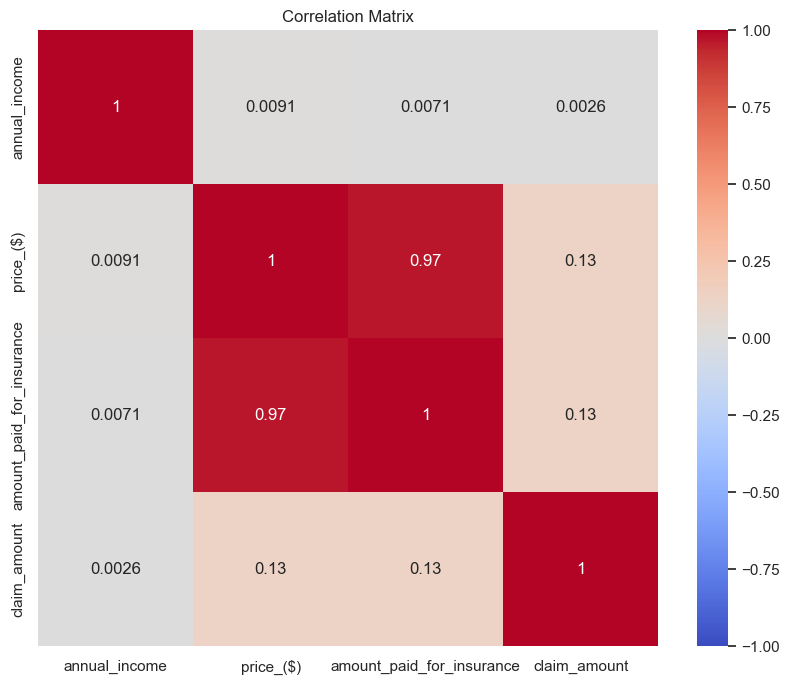

In [926]:
# Correlation matrix
numerical_cols=['annual_income', 'price_($)', 'amount_paid_for_insurance', 'claim_amount']
corr_matrix = df[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


A very strong correlation between "price" and "amount_paid_for_insurance" is evident at first glance, so we can dispense with one of them.

In [927]:
df.info()
df.sample()


<class 'pandas.core.frame.DataFrame'>
Index: 21742 entries, 0 to 23905
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   car_id                     21742 non-null  object        
 1   date                       21742 non-null  datetime64[ns]
 2   customer_name              21741 non-null  category      
 3   gender                     21742 non-null  category      
 4   annual_income              21742 non-null  int64         
 5   dealer_name                21742 non-null  category      
 6   company                    21742 non-null  category      
 7   model                      21742 non-null  category      
 8   engine                     21742 non-null  category      
 9   transmission               21742 non-null  category      
 10  color                      21742 non-null  category      
 11  price_($)                  21742 non-null  int64         
 12  dealer_no

,car_id,date,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price_($),dealer_no,body_style,phone,amount_paid_for_insurance,claim_amount,city,zip_usa,location_import
14894,C_CND_014895,2023-06-17,Mina,Female,13500,Motor Vehicle Branch Office,Infiniti,I30,Double Overhead Camshaft,Auto,Black,21000,78758-7841,Hardtop,7029964,1539,0.00,Riga,78758,"Austin, TX"


We can eliminate "car_id," "Customer Name," and "Phone" because they do not provide relevant information for training the model. Additionally, we will remove "Price" since it has a high correlation with "amount_paid_for_insurance."

We will also remove "dealer_no" because we have already extracted the information from the USA postal code, so we do not want to have duplicate information.

In [928]:
# Lista de columnas a eliminar
columns_to_drop = ['car_id', 'customer_name', 'phone', 'price_($)', 'dealer_no']

# Eliminar las columnas
df = df.drop(columns=columns_to_drop)

# Mostrar las primeras filas para verificar
df.head()



,date,gender,annual_income,dealer_name,company,model,engine,transmission,color,body_style,amount_paid_for_insurance,claim_amount,city,zip_usa,location_import
0,2022-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,SUV,1665,0.00,Riga,06457,"Middletown, CT"
1,2022-01-02,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,SUV,1332,1900.00,Liepaja,60504,"Aurora, IL"
2,2022-01-02,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,Passenger,1897,0.00,Riga,38701,"Greenville, MS"
3,2022-01-02,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,SUV,1176,0.00,Jelgava,99301,"Pasco, WA"
4,2022-01-02,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,Hatchback,1323,2450.00,Liepaja,53546,"Janesville, WI"


## Encoding variables

Now, with the data as it is, we should look for patterns for an optimal insurance customer profile. We will need to review the number of clusters (elbow method) and then perform clustering.

We have the necessary data, and our objective is to look for patterns within the data to find different types of profiles. For this, we need to encode the categorical variables to train the model.

We will use various techniques such as One-Hot Encoding for variables with few distinct categorical values, Frequency Encoding, which replaces categories with the frequency of their appearance in the data, and finally, substitute categorical variables with equivalent numerical values such as a city's postal code, RGB code for color, etc.

In [929]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21742 entries, 0 to 23905
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       21742 non-null  datetime64[ns]
 1   gender                     21742 non-null  category      
 2   annual_income              21742 non-null  int64         
 3   dealer_name                21742 non-null  category      
 4   company                    21742 non-null  category      
 5   model                      21742 non-null  category      
 6   engine                     21742 non-null  category      
 7   transmission               21742 non-null  category      
 8   color                      21742 non-null  category      
 9   body_style                 21742 non-null  category      
 10  amount_paid_for_insurance  21742 non-null  int64         
 11  claim_amount               21742 non-null  float64       
 12  city     

In [930]:
df['color'] = df['color'].astype('object')
# Create the dictionary for mapping colours to RGB values
color_to_rgb = {
    'Black': (0, 0, 0),
    'Red': (255, 0, 0),
    'Pale White': (255, 255, 255)
}

# Function to map the colour to its RGB value
def map_color_to_rgb(color):
    return color_to_rgb.get(color, (0, 0, 0)) 


df['color_rgb'] = df['color'].map(map_color_to_rgb)

df[['R', 'G', 'B']] = pd.DataFrame(df['color_rgb'].tolist(), index=df.index)

df = df.drop('color_rgb', axis=1)

#code the city by postcode
postal_code={
'Riga':1001,
'Liepaja': 3401,
'Jelgava': 3001,
'Ventspils': 3601,
'Daugavpils': 5401,
'Tukums': 3101
}
def map_zip(city):
    return postal_code.get(city,0)
df['zip_latvia']=df['city'].map(map_zip)
df['zip_latvia']=df['zip_latvia'].astype('int64')

#we also pass to integer the car's zip file from usa.
df['zip_usa']=df['zip_usa'].astype('int64')

#split the date into year, month and day columns
df['date'] = pd.to_datetime(df['date'], format='%m-%d-%Y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.drop(columns=['date'])

In [931]:
#let's try coding model company and dealer name

# Frequency Coding
def frequency_encoding(column):
    freq_encoding = column.value_counts() / len(column)
    return column.map(freq_encoding)
df['company_model'] = df.company.str.cat(df.model ,sep='-')


df['dealer_name_encoded'] = frequency_encoding(df['dealer_name'])
df['company_model_encoded'] = frequency_encoding(df['company_model'])

#coded onhotencoder from the following columns gender, bodystyle transmission, engine 
df = pd.get_dummies(df, columns=['gender', 'engine','transmission', 'body_style'], drop_first=False)

In [932]:
dropcolumns = df.select_dtypes(include = ["object", "category","datetime64[ns]"]).columns
df = df.drop(columns=dropcolumns)

In [933]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21742 entries, 0 to 23905
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   annual_income                    21742 non-null  int64  
 1   amount_paid_for_insurance        21742 non-null  int64  
 2   claim_amount                     21742 non-null  float64
 3   zip_usa                          21742 non-null  int64  
 4   R                                21742 non-null  int64  
 5   G                                21742 non-null  int64  
 6   B                                21742 non-null  int64  
 7   zip_latvia                       21742 non-null  int64  
 8   year                             21742 non-null  int32  
 9   month                            21742 non-null  int32  
 10  day                              21742 non-null  int32  
 11  dealer_name_encoded              21742 non-null  float64
 12  company_model_encoded  

As we can see, we now have all the data ready to look for customer profile patterns and analyze risk factors.

## Customer Profile Patterns and Risk Factors



We will use clustering techniques to discover hidden patterns.
First, we will determine how many clusters to use with the elbow method.
Finally, we use the K-Means algorithm to group the data and uncover hidden patterns.


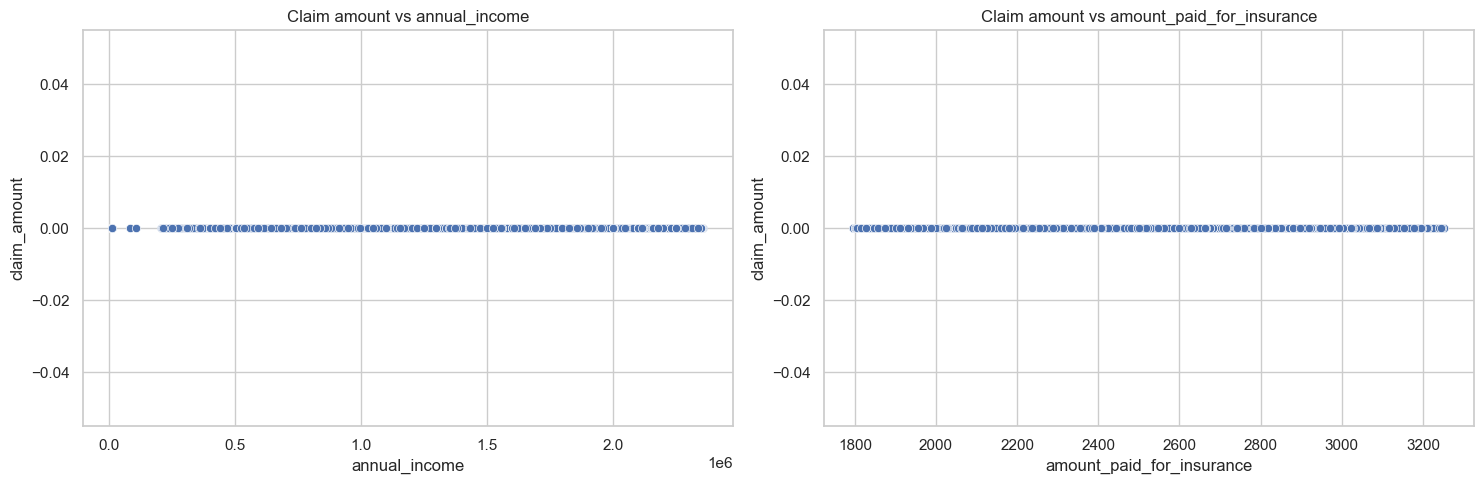

In [934]:
# We visualise the relationship between Claim amount and other characteristics to identify risk factors.
#Scatter plots num
numerical_cols=['annual_income', 'amount_paid_for_insurance', 'claim_amount']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols[:-1]):
    plt.subplot(1, 2, i+1)
    sns.scatterplot(x=client1[col], y=client1['claim_amount'])
    plt.title(f'Claim amount vs {col}')
plt.tight_layout()
plt.show()



/Users/josecarlosavilapalazon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josecarlosavilapalazon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josecarlosavilapalazon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josecarlosavilapalazon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1

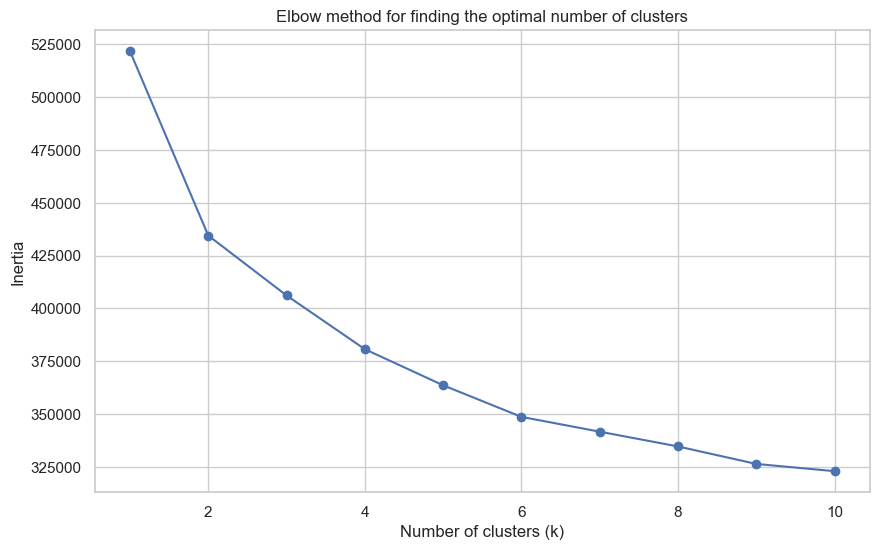

In [935]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
numerical_cols=['amount_paid_for_insurance', 'claim_amount']
# Normalized
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Elbow Method
inertia = []
K = range(1, 11) 
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow method for finding the optimal number of clusters')
plt.show()


/Users/josecarlosavilapalazon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


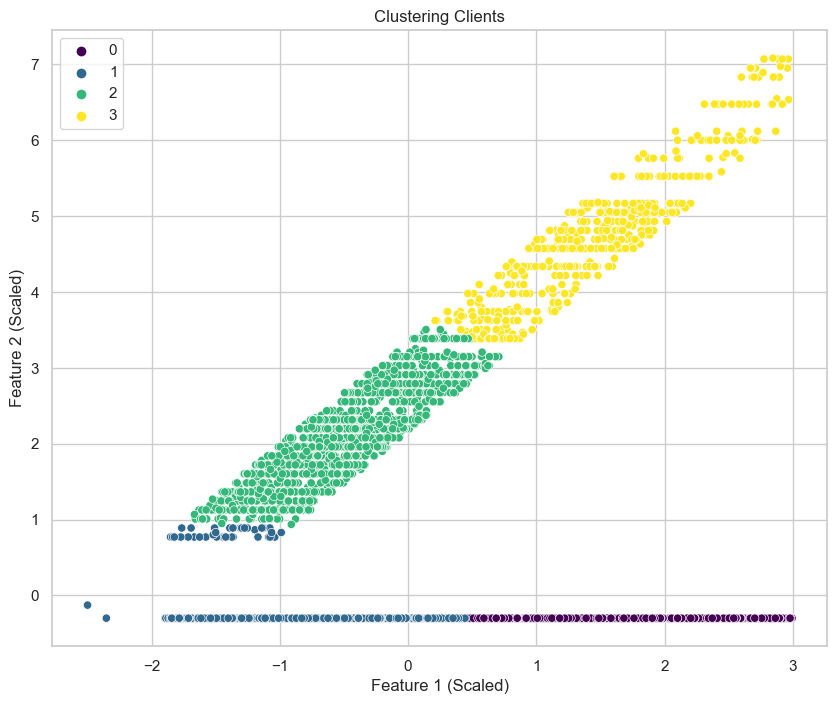

In [936]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numerical_cols])

# K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

df['client_tpye'] = clusters

# Visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters, palette='viridis')
plt.title('Clustering Clients')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()

In [937]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21742 entries, 0 to 23905
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   annual_income                    21742 non-null  int64  
 1   amount_paid_for_insurance        21742 non-null  int64  
 2   claim_amount                     21742 non-null  float64
 3   zip_usa                          21742 non-null  int64  
 4   R                                21742 non-null  int64  
 5   G                                21742 non-null  int64  
 6   B                                21742 non-null  int64  
 7   zip_latvia                       21742 non-null  int64  
 8   year                             21742 non-null  int32  
 9   month                            21742 non-null  int32  
 10  day                              21742 non-null  int32  
 11  dealer_name_encoded              21742 non-null  float64
 12  company_model_encoded  

In [938]:
df['profile']=df['amount_paid_for_insurance']-df['claim_amount']

In [939]:
print(df[['profile','client_tpye']])

       profile  client_tpye
0      1665.00            1
1      -568.00            2
2      1897.00            0
3      1176.00            1
4     -1127.00            2
...        ...          ...
23901  -508.00            2
23902  1072.00            1
23903  1061.00            1
23904 -1178.00            3
23905  1492.00            1

[21742 rows x 2 columns]


In [940]:
client1 = df.loc[df['client_tpye'] == 0]
client2= df.loc[df['client_tpye'] == 1]
client3= df.loc[df['client_tpye'] == 2]
client4= df.loc[df['client_tpye'] == 3]

print(client1['profile'].mean())
print(client2['profile'].mean())
print(client3['profile'].mean())
print(client4['profile'].mean())

2343.428017074117
1245.2068370165746
-761.2151573538857
-1839.9600725952814


In [941]:
print(client1['annual_income'].mean())
print(client1['amount_paid_for_insurance'].mean())

752864.4650756693
2343.428017074117


As we can see, customer type 1 is the most optimal for the insurer, generating approximately 2343.42 in profit per customer, whereas customer type 4 results in a loss of 1839.96.

The optimal customer has an annual income of approximately 752,864.5 and pays 2343.42 for their insurance.

In [942]:
#  Review the correlations between the characteristics and the target variable.
df.rename(columns={'client_tpye': 'client_type'}, inplace=True)
correlations = df.corr()
target_corr = correlations['client_type'].sort_values(ascending=False)
print('Correlations with the target variable:')
print(target_corr)


Correlations with the target variable:
client_type                        1.00
claim_amount                       0.73
transmission_Manual                0.04
engine_Overhead Camshaft           0.04
body_style_SUV                     0.04
company_model_encoded              0.03
body_style_Hatchback               0.03
R                                  0.02
G                                  0.01
B                                  0.01
zip_latvia                         0.01
day                                0.00
zip_usa                            0.00
year                               0.00
dealer_name_encoded                0.00
month                              0.00
gender_Male                        0.00
annual_income                     -0.00
gender_Female                     -0.00
body_style_Hardtop                -0.01
body_style_Passenger              -0.03
body_style_Sedan                  -0.04
transmission_Auto                 -0.04
engine_Double Overhead Camshaft   -0.04
a

## Classification Model

We develop a classification model to predict the type of customer we are dealing with.

Accuracy: 0.9054955162106232
Confusion Matrix:
[[1097    0    0    0]
 [   0 2841    0    0]
 [   8  306    0    0]
 [  96    1    0    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1097
           1       0.90      1.00      0.95      2841
           2       0.00      0.00      0.00       314
           3       0.00      0.00      0.00        97

    accuracy                           0.91      4349
   macro avg       0.45      0.50      0.48      4349
weighted avg       0.82      0.91      0.86      4349



/Users/josecarlosavilapalazon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/josecarlosavilapalazon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/josecarlosavilapalazon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

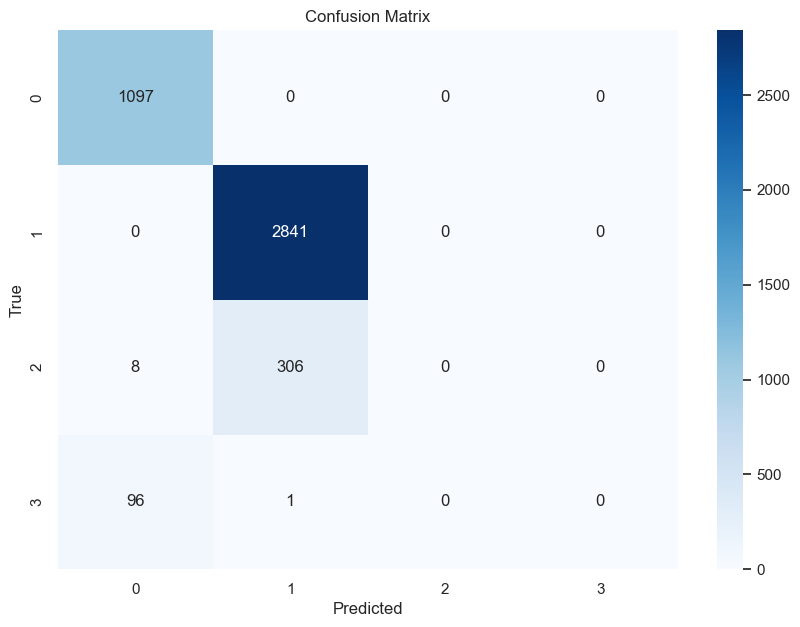

In [943]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Rename the column
df.rename(columns={'client_tpye': 'client_type'}, inplace=True)

# Ensure the DataFrame `df` has the column 'client_type'
if 'client_type' not in df.columns:
    raise KeyError("The column 'client_type' is not present in the DataFrame")

# Separate features (X) and target variable (y)
#these variables should be removed because of their high correlation with the target variable.
X = df.drop(columns=['client_type', 'profile','claim_amount'])  
y = df['client_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the classification model
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Conclusions

The data was well-distributed across different customer types, but the number of records is very small for training the model.

I believe that with more time, we can explore the data much further. We can also automate functions with libraries (such as RGB color and postal codes), and with a larger volume of data, we can significantly improve the models.

I would also like to mention that clustering techniques have been tested with different characteristics, such as the type of customer along with data about the car (transmission, body style, model, etc.), but nothing was found that provided us with more information.

Lastly, I intended to show the entire process, including both the good and the bad results.